## Crime Data set

## Hierarchical

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
crime = pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
#Normalisation function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
df_norm = norm_func(crime.iloc[:,1:])

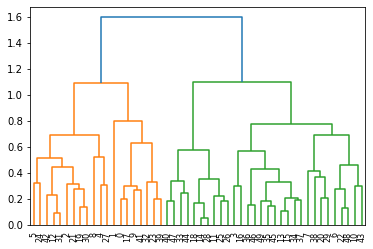

In [5]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete',metric='euclidean'))

In [6]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')

In [7]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc,columns=['clusters'])

In [8]:
clusters.value_counts()

clusters
1           20
3           12
2           10
0            8
dtype: int64

### K-Means 

In [9]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

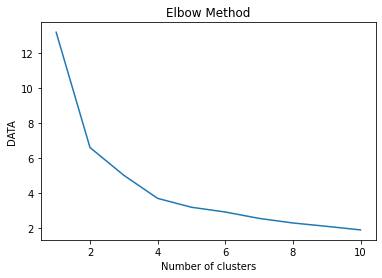

In [10]:
data = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_norm)
    data.append(kmeans.inertia_)
plt.plot(range(1, 11), data)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('DATA')
plt.show()

In [11]:
model2 = KMeans(n_clusters=4).fit(df_norm)
model2.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       3, 0, 2, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 3, 1])

In [12]:
kmean_cluster = pd.Series(model2.labels_)
kmean_cluster.value_counts()

1    16
2    13
3    13
0     8
dtype: int64

### DBscan 

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [14]:
stscaler = StandardScaler().fit(df_norm)
X = stscaler.transform(df_norm)

In [15]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [16]:
dbsan = DBSCAN(eps=0.8, min_samples=4)
dbsan.fit(X)

DBSCAN(eps=0.8, min_samples=4)

In [17]:
dbsan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [18]:
dbscan_cluster = pd.DataFrame(dbsan.labels_,columns=['Cluster'])

In [19]:
dbscan_cluster

,Cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [20]:
dbscan_cluster.value_counts()

Cluster
-1         33
 0         17
dtype: int64